In [12]:
import ocel
import ocel_features.util.log_decompositions as ld
import ocel_features.util.data_organization as do
import ocel_features.util.log_series as ls
import ocel_features.analysis.plot_data as pd
from datetime import timedelta

log = ocel.import_log('../logs/bpi2017-complete.jsonocel')

**1. Log Decompositions** -> applied to a single log (can also be applied recursively)

In [13]:
split_by_day = ld.decompose_log(log, ld.Decompositions.TIME_DAY)
print(f'split_by_day total sublogs: {len(split_by_day)}')

# params only the weekdays
params = {'included_days': list(range(5))}
single_weekdays = ld.decompose_log(log, ld.Decompositions.TIME_SINGLE_WEEK_DAYS, params)
print(f'single_weekdays total sublogs: {len(single_weekdays)}')

full_week_weekdays = ld.decompose_log(log, ld.Decompositions.TIME_WEEK_DAYS, params)
print(f'full_week_weekdays total sublogs: {len(full_week_weekdays)}')

split_by_day total sublogs: 398
single_weekdays total sublogs: 284
full_week_weekdays total sublogs: 58


**2. Log Series** -> can be applied to whole log or a sublog

In [14]:
# binning = ls.get_equal_time_binning(log)
binning = ls.get_time_diff_binning(log, timedelta(days=1))
# binning = ls.get_date_range_binning(log, range(5))

# activity_count, total_obj_count, unique_obj_count, obj_property_operator, ev_property_operator
func = ls.LogFunctions.UNIQUE_OBJ_COUNT 
series_whole = ls.apply_func_to_binning(log, binning, func)
series_gapless = ls.apply_func_to_binning(log, ls.remove_bin_gaps(binning), func)

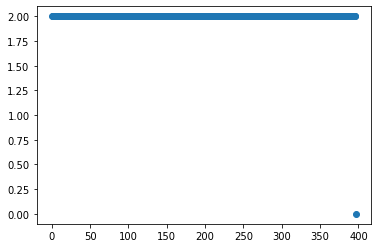

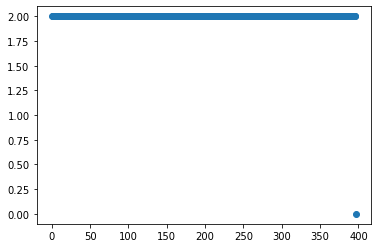

In [15]:
# basic plotting series
pd.plot_time_series_scatter(series_whole)
pd.plot_time_series_scatter(series_gapless)  # ie. removed the 0 bins

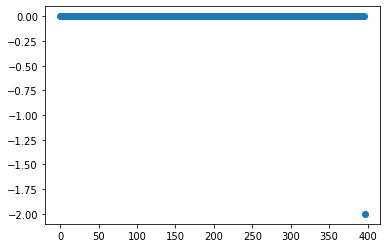

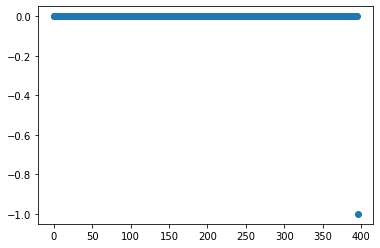

In [16]:
# checking out the differences between the points in time (ie. post-processing)
absolute_differences = ls.series_differences_absolute(series_whole)
percentage_differences = ls.series_differences_percentage(series_whole)

# plotting
pd.plot_time_series_scatter(absolute_differences)
pd.plot_time_series_scatter(percentage_differences)

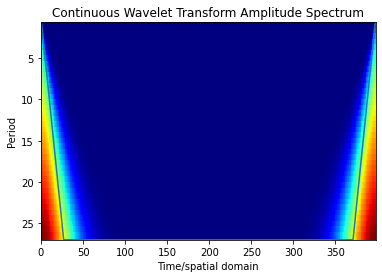

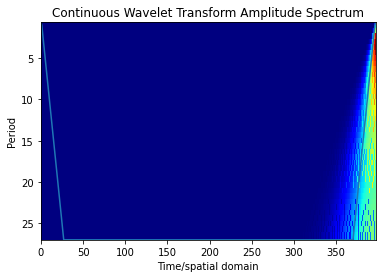

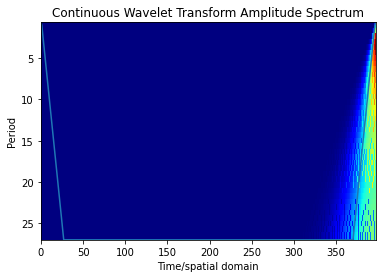

In [17]:
# using wavelet transform to visualize differences
pd.plot_time_series_wavelet(series_whole)
pd.plot_time_series_wavelet(absolute_differences)
pd.plot_time_series_wavelet(percentage_differences)

In [18]:
# find out unique event attributes
ev_attr = set()
{ev_attr.update(log['ocel:events'][x]['ocel:vmap']) for x in log['ocel:events']}
ev_attr

{'Accepted',
 'Action',
 'CreditScore',
 'FirstWithdrawalAmount',
 'MonthlyCost',
 'NumberOfTerms',
 'OfferID',
 'OfferedAmount',
 'Selected',
 'concept:name',
 'lifecycle:transition',
 'time:timestamp'}

In [19]:
# find out unique object attributes
obj_attr = set()
{ev_attr.update(log['ocel:objects'][x]['ocel:ovmap']) for x in log['ocel:objects']}
obj_attr

set()

In [29]:
binning = ls.get_time_diff_binning(log, timedelta(days=1))

# activity_count, total_obj_count, unique_obj_count, obj_property_operator, ev_property_operator
func = ls.LogFunctions.EV_PROPERTY_OPERATOR
params = {'property': 'MonthlyCost', 'operator': do.Operators.SUM}
property_series = ls.apply_func_to_binning(log, binning, func, params)

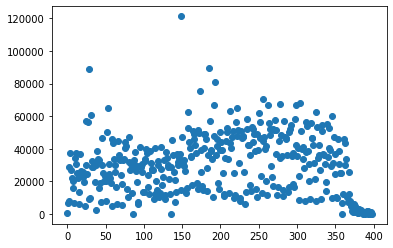

In [30]:
# general overview 
pd.plot_time_series_scatter(property_series)

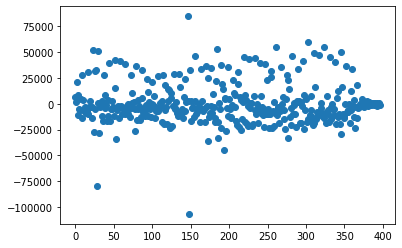

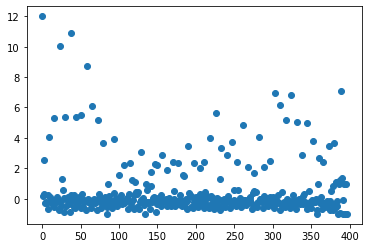

In [31]:
# looking at the differences
prop_absolute = ls.series_differences_absolute(property_series)
prop_rel = ls.series_differences_percentage(property_series)

# plotting
pd.plot_time_series_scatter(prop_absolute)
pd.plot_time_series_scatter(prop_rel)